# EDA on agreggated dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scripts import ds_ultils
import plotly.express as px
from scripts.f1_ultils import *
from scripts.ds_ultils import *

# Load data

In [2]:
qualifying_data=pd.read_csv('./data/model_data/formula1_2018_2019_5GP_aggregated.csv')

In [3]:
qualifying_df= qualifying_data.copy()

In [4]:
list(qualifying_df.columns)

['raceId',
 'driverRef',
 'circuitRef',
 'country',
 'nationality_drivers',
 'constructorRef',
 'nationality_constructors',
 'year',
 'lat_x',
 'lng_x',
 'alt',
 'qualifyId',
 'quali_position',
 'positionOrder',
 'points',
 'points_drivers',
 'position_drivers',
 'wins_drivers',
 'points_constructors',
 'position_constructors',
 'wins_constructors',
 'points_constructor_ind_races',
 'age',
 'fastest_lap_milliseconds',
 'circuit_length',
 'circuit_total_straight',
 'circuit_mean_straight',
 'circuit_max_straight',
 'circuit_total_corner_length',
 'circuit_mean_corner_length',
 'circuit_max_corner_length',
 'circuit_total_corner_curvature',
 'circuit_mean_corner_curvature',
 'circuit_max_corner_curvature',
 'circuit_std_corner_curvature',
 'circuit_number_of_corners',
 'max_max_speed',
 'max_fastest_lap_speed',
 'var_fastest_lap_speed',
 'min_fastest_lap_speed',
 'max_lap_speed',
 'var_lap_speed',
 'bottom_lap_speed',
 'mean_straight_speed',
 'var_straight_speed',
 'max_fastest_acclerati

# Evaluate Target

In [5]:

qualifying_df['positionOrder'].describe()

count    197.000000
mean      10.492386
std        5.821862
min        1.000000
25%        5.000000
50%       10.000000
75%       16.000000
max       20.000000
Name: positionOrder, dtype: float64

<AxesSubplot: xlabel='quali_position', ylabel='Count'>

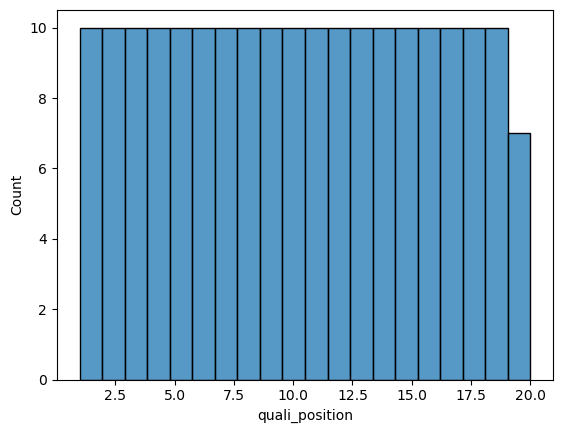

In [6]:
sns.histplot(data = qualifying_df ,x='quali_position',bins=20)

In [7]:
qualifying_df['fastest_lap_milliseconds'].describe()

count      197.000000
mean     76953.472081
std       9766.507890
min      63003.000000
25%      71232.000000
50%      76588.000000
75%      78782.000000
max      99197.000000
Name: fastest_lap_milliseconds, dtype: float64

<AxesSubplot: xlabel='fastest_lap_milliseconds', ylabel='Count'>

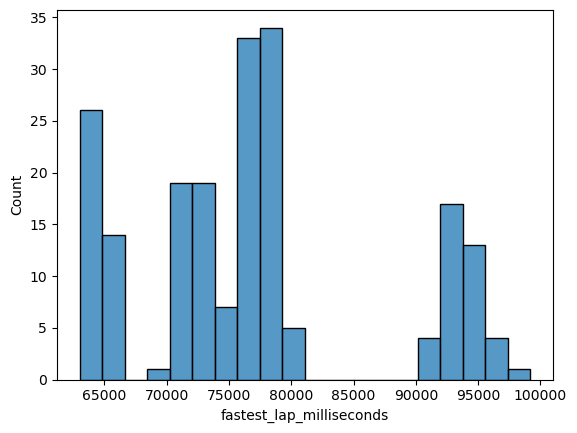

In [8]:
sns.histplot(data = qualifying_df ,x='fastest_lap_milliseconds',bins=20)

## Bin position into bins of 5

In [9]:
qualifying_df['quali_position_binned'] = pd.cut(qualifying_df['quali_position'],bins=4,labels=['0_to_5','5_to_10','eleven_to_15','fifteen_&_above'])

<AxesSubplot: xlabel='quali_position_binned', ylabel='Count'>

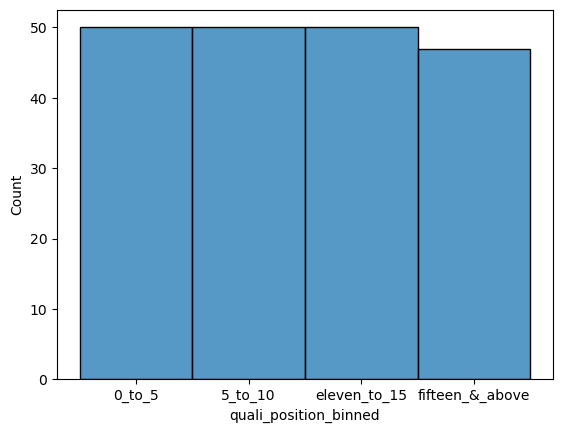

In [10]:
sns.histplot(data = qualifying_df ,x='quali_position_binned',bins=20)

In [11]:
races = qualifying_df['raceId'].unique()
for race in races:
    query = (qualifying_df['raceId'] == race)
    fastesttime= qualifying_df.loc[(query) & (qualifying_df['quali_position'] == 1),'fastest_lap_milliseconds'].values
    
    qualifying_df.loc[query,'lap_timedelta_milliseconds']=(np.where(qualifying_df.loc[query,'quali_position']==1,0,(fastesttime-qualifying_df.loc[query,'fastest_lap_milliseconds'])))

In [12]:
qualifying_df['lap_timedelta_milliseconds'].describe()

count     197.000000
mean    -1647.538071
std      1182.851464
min     -7569.000000
25%     -2236.000000
50%     -1558.000000
75%      -850.000000
max       753.000000
Name: lap_timedelta_milliseconds, dtype: float64

In [13]:
qualifying_df.loc[qualifying_df['raceId'] ==1000,['quali_position','positionOrder','lap_timedelta_milliseconds','fastest_lap_milliseconds','fastest_lap_milliseconds_clean']]

,quali_position,positionOrder,lap_timedelta_milliseconds,fastest_lap_milliseconds,fastest_lap_milliseconds_clean
58,11.0,8.0,-789.0,78208.0,78208.0
59,2.0,5.0,296.0,77123.0,77123.0
60,8.0,11.0,-1010.0,78429.0,78429.0
61,14.0,15.0,-1222.0,78641.0,78641.0
62,6.0,6.0,-1158.0,78577.0,78577.0
63,10.0,10.0,-482.0,77901.0,77901.0
64,1.0,1.0,0.0,77419.0,77419.0
65,13.0,12.0,-486.0,77905.0,77905.0
66,9.0,7.0,-895.0,78314.0,78314.0
67,17.0,20.0,-1398.0,78817.0,78817.0


In [14]:
ergast_combined_df=pd.read_csv('./data/clean/combined_ergast_clean.csv')

C:\Users\ben44\AppData\Local\Temp\ipykernel_28388\450351449.py:1: DtypeWarning: Columns (8,9,39,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  ergast_combined_df=pd.read_csv('./data/clean/combined_ergast_clean.csv')


In [15]:
ergast_combined_df.loc[ergast_combined_df['raceId']==1000,['q2','q3']]

,q2,q3
3911,1:32.762,1:36.186
3912,1:28.636,1:36.210
3913,1:30.771,1:36.743
3914,1:31.286,1:37.591
3915,1:31.178,1:38.032
3916,1:32.590,1:38.128
3917,1:32.968,1:39.858
3918,1:33.650,1:40.593
3919,1:35.214,NaN
3920,1:36.442,NaN


Need to go back to fix q3 times overwritten by q2 times when slower to preserve format

<AxesSubplot: xlabel='lap_timedelta_milliseconds', ylabel='Count'>

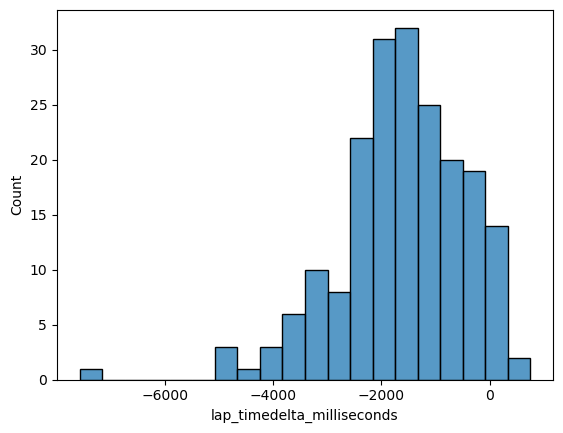

In [16]:
sns.histplot(data = qualifying_df ,x='lap_timedelta_milliseconds',bins=20)


Temp fix cut of values above 0

In [17]:
qualifying_df['lap_timedelta_milliseconds'] = np.where(qualifying_df['lap_timedelta_milliseconds'] >0,0,qualifying_df['lap_timedelta_milliseconds'])

In [18]:
qualifying_df['lap_timedelta_milliseconds'].describe()

count     197.000000
mean    -1655.294416
std      1169.990783
min     -7569.000000
25%     -2236.000000
50%     -1558.000000
75%      -850.000000
max         0.000000
Name: lap_timedelta_milliseconds, dtype: float64

In [19]:
qualifying_df['lap_timedelta_seconds_binned'] = pd.qcut(qualifying_df['lap_timedelta_milliseconds'],q=4,labels=['>2.2s','2.2-1.5s','1.5-0.8s','0.8-0s'])

<AxesSubplot: xlabel='lap_timedelta_seconds_binned', ylabel='Count'>

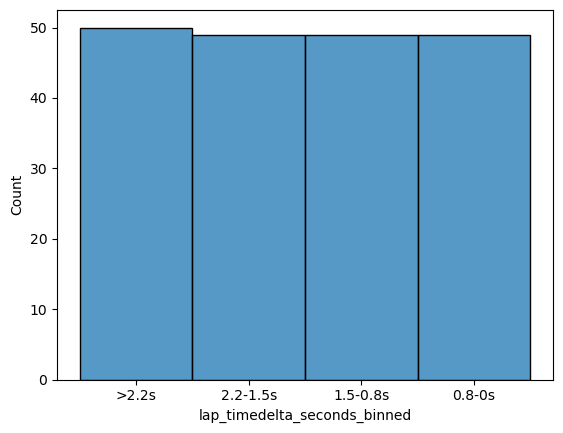

In [20]:
sns.histplot(data = qualifying_df ,x='lap_timedelta_seconds_binned',bins=20)

# Evaluate Numerical Variables


In [21]:
variables_explore(qualifying_df)


Dataframe numeric columns: 
 raceId,
year,
lat_x,
lng_x,
alt,
qualifyId,
quali_position,
positionOrder,
points,
points_drivers,
position_drivers,
wins_drivers,
points_constructors,
position_constructors,
wins_constructors,
points_constructor_ind_races,
age,
fastest_lap_milliseconds,
circuit_length,
circuit_total_straight,
circuit_mean_straight,
circuit_max_straight,
circuit_total_corner_length,
circuit_mean_corner_length,
circuit_max_corner_length,
circuit_total_corner_curvature,
circuit_mean_corner_curvature,
circuit_max_corner_curvature,
circuit_std_corner_curvature,
circuit_number_of_corners,
max_max_speed,
max_fastest_lap_speed,
var_fastest_lap_speed,
min_fastest_lap_speed,
max_lap_speed,
var_lap_speed,
bottom_lap_speed,
mean_straight_speed,
var_straight_speed,
max_fastest_accleration,
var_fastest_accleration,
min_fastest_accleration,
mean_top_lap_accleration,
mean_var_lap_accleration,
mean_min_lap_accleration,
max_fastest_lap_rpm,
var_fastest_lap_straight_rpm,
mean_fastest_lap_st

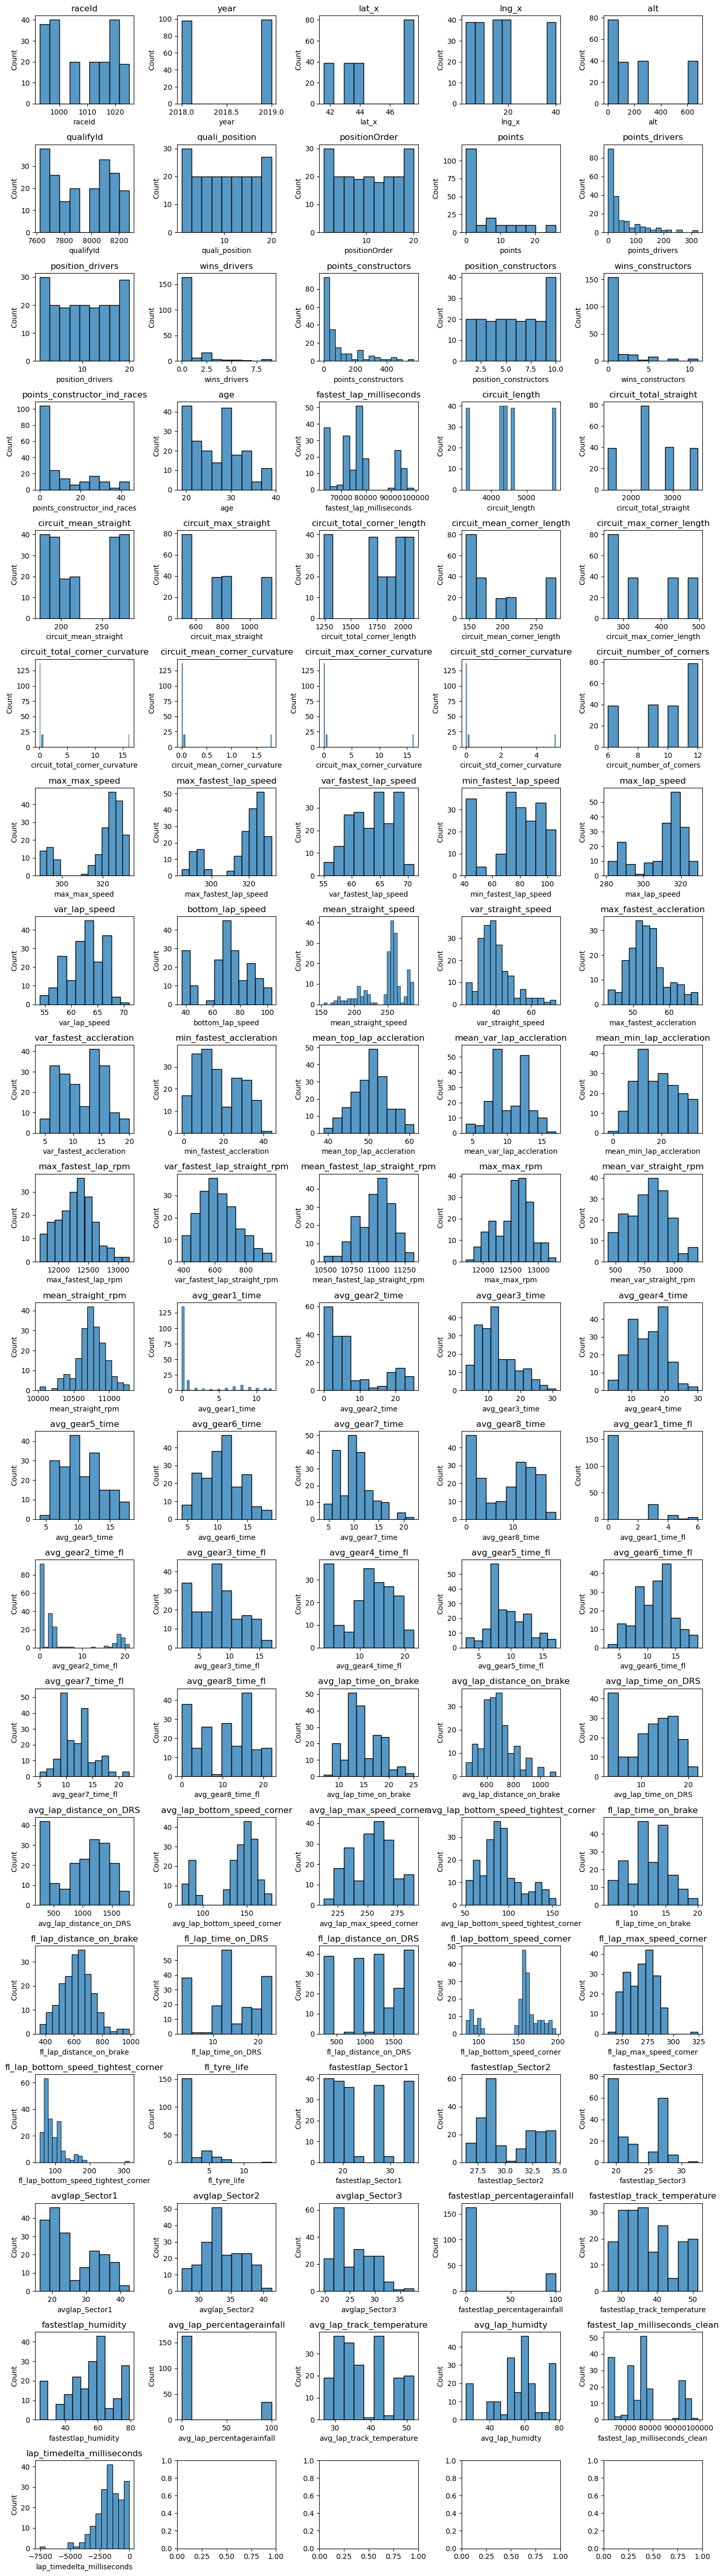

In [22]:
plot_numerical_variables_hist(qualifying_df)

# Evaluate Categorical Variables


In [23]:
cat_list = list(qualifying_df.select_dtypes("object").columns)+list(qualifying_df.select_dtypes("category").columns)

In [24]:
def plot_categorical_cols_by_dim(df,dim,columns=5,**kwargs):
    figsize=(14,12)
    cat_list = list(df.select_dtypes("object").columns)+list(df.select_dtypes("category").columns)
    fig,axes=plt.subplots(math.ceil(len(df[cat_list].columns)/columns), columns, figsize=figsize)
    for col,axes in zip(df[cat_list].columns,axes.flatten()):
        total_count = df.groupby([col, dim])[col].count()
        pct_contact_type = total_count/df.groupby(col)[col].count()
        pct_contact_type = pct_contact_type.unstack()
        #print(pct_contact_type)
        #print(pct_contact_type.sort_values())    
        pct_contact_type.plot(kind="bar", stacked=True, ax=axes)
        sns.despine(left=True)
        axes.set_title(f"{col} group distribution", size=10)
    plt.tight_layout()
    plt.show()

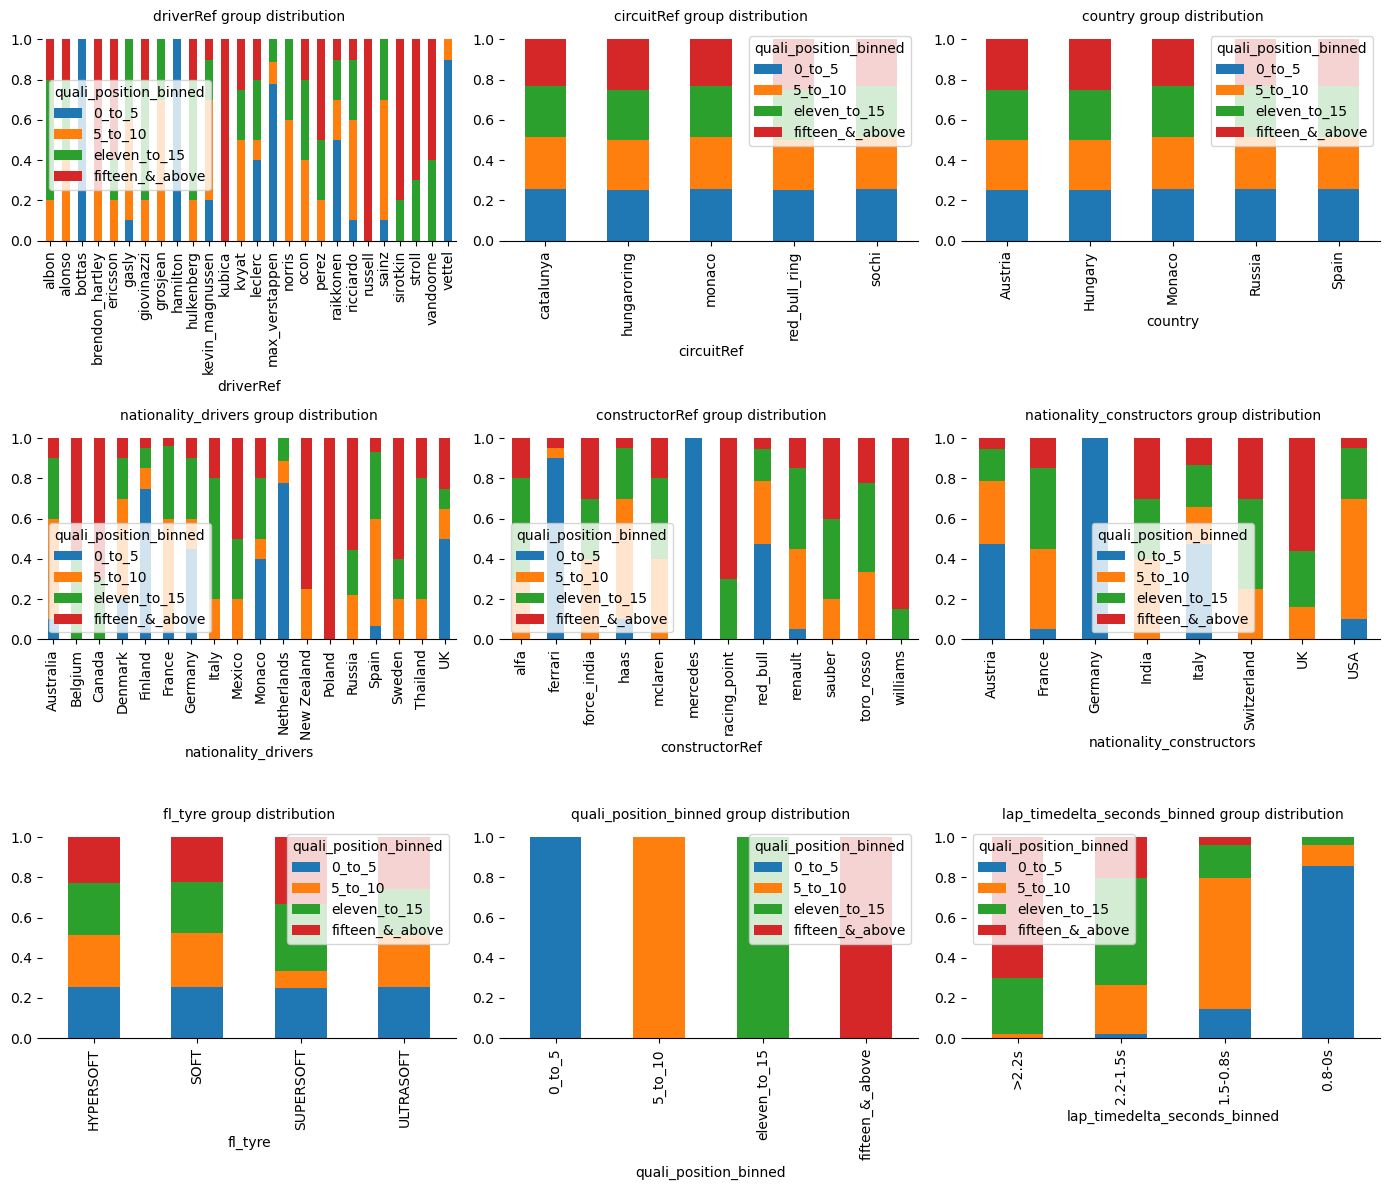

In [25]:
plot_categorical_cols_by_dim(qualifying_df,'quali_position_binned',columns=3)

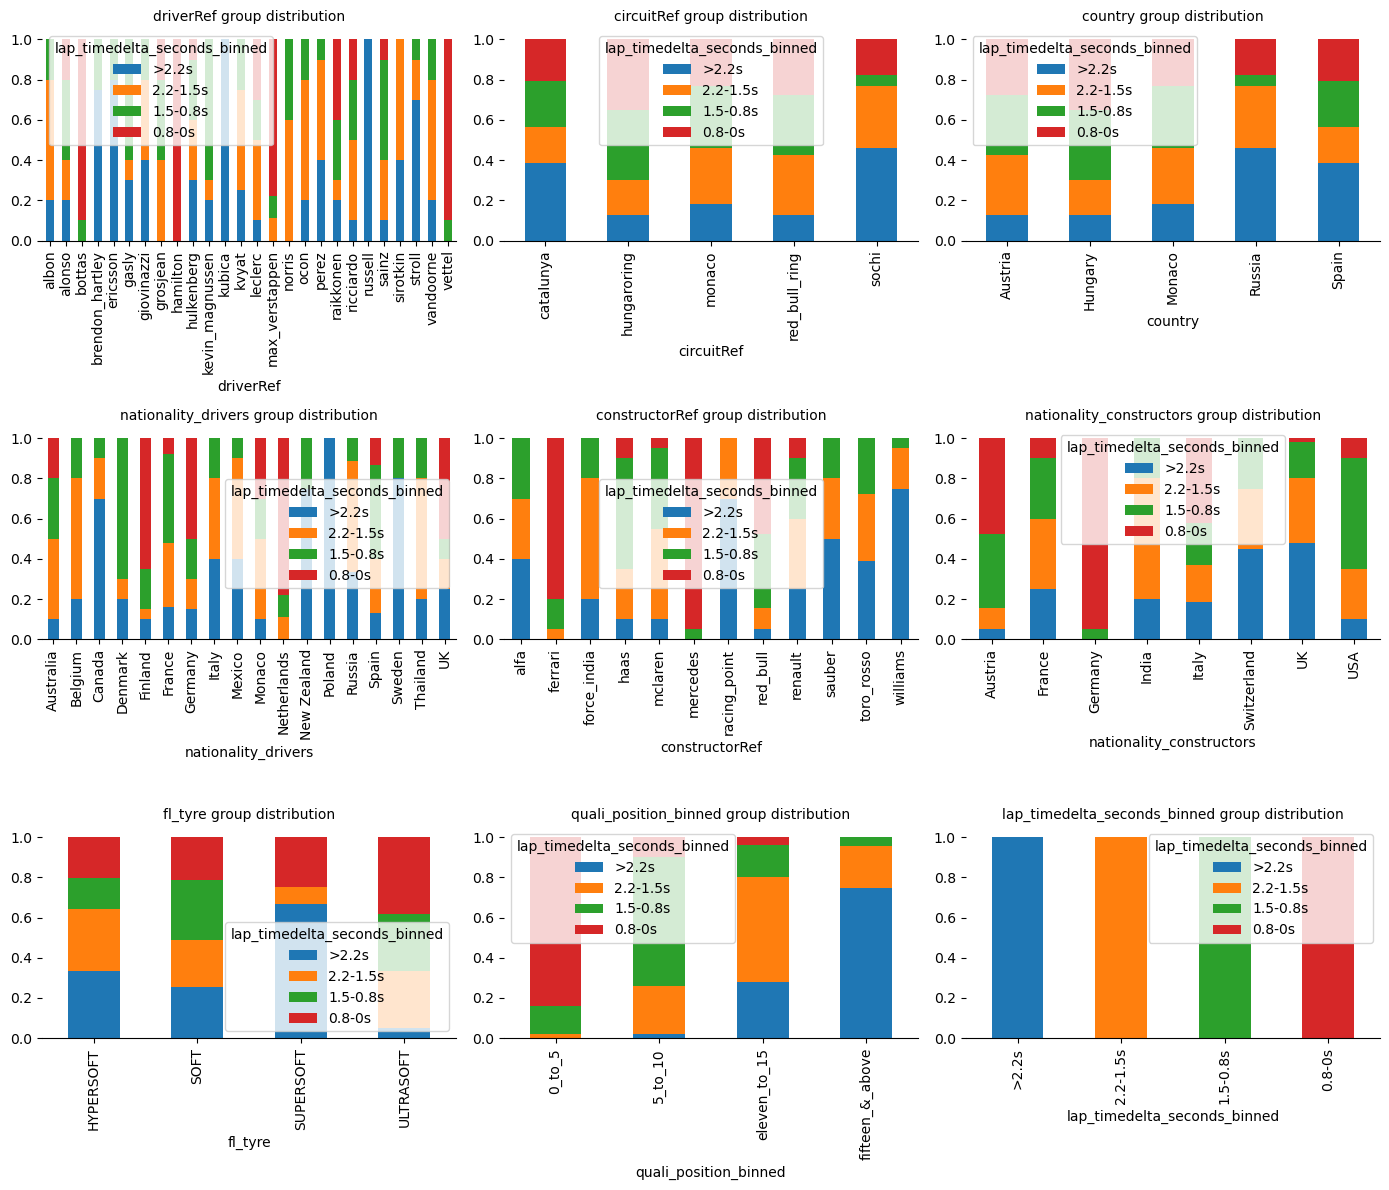

In [26]:
plot_categorical_cols_by_dim(qualifying_df,'lap_timedelta_seconds_binned',columns=3)

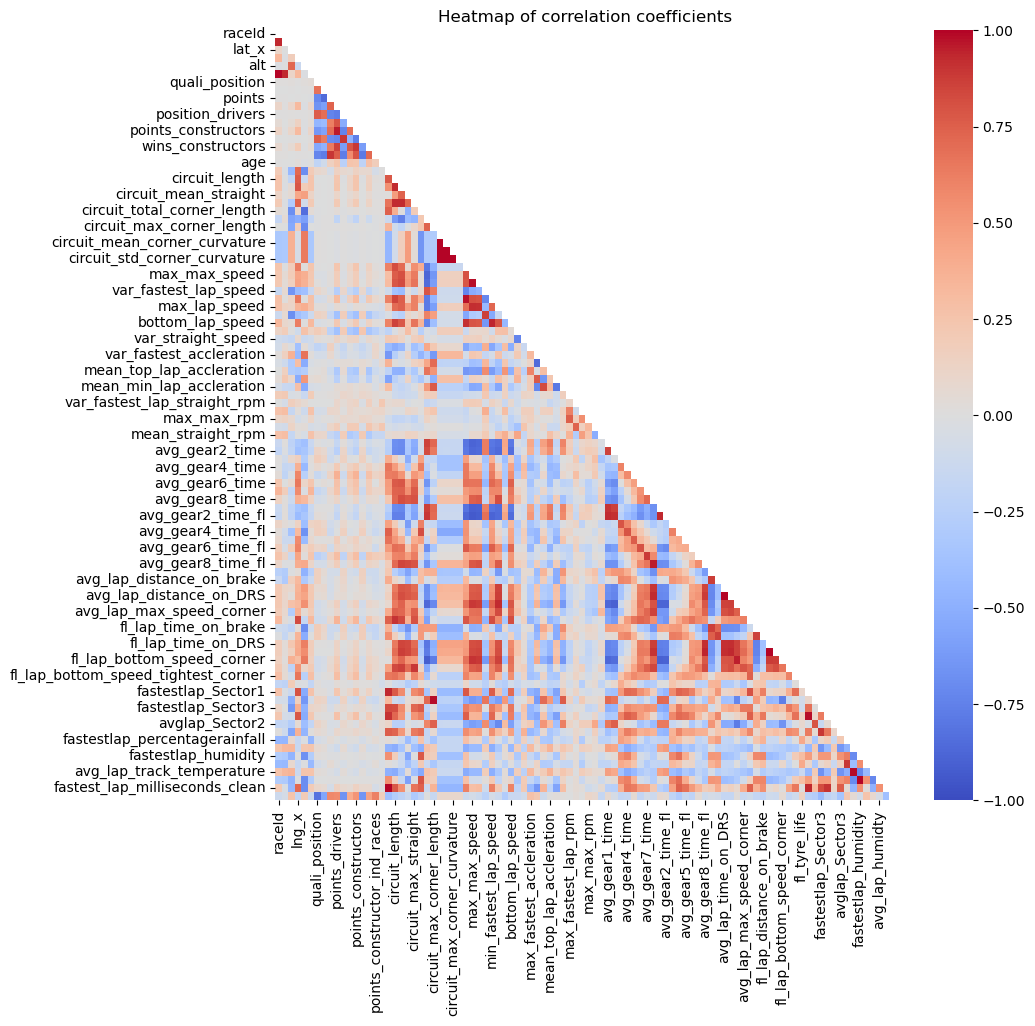

-------------------------------
VIF test results


c:\Users\ben44\.conda\envs\formula1\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\ben44\.conda\envs\formula1\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Variation Inflation Factor : 
 raceId                                    inf
year                                      inf
lat_x                                     inf
lng_x                                     inf
alt                                       inf
                                     ...     
avg_lap_percentagerainfall           8.828053
avg_lap_track_temperature         1187.413033
avg_lap_humidty                    816.744042
fastest_lap_milliseconds_clean            inf
lap_timedelta_milliseconds         587.163659
Length: 96, dtype: float64
-----------------------------------


In [27]:
independence_test(qualifying_df,qualifying_df.select_dtypes("number").columns,annot=False)

# Feature Engineer

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [30]:
qualifying_df['driverRef'].tolist()

['alonso',
 'bottas',
 'ericsson',
 'gasly',
 'grosjean',
 'hamilton',
 'hulkenberg',
 'kevin_magnussen',
 'leclerc',
 'max_verstappen',
 'ocon',
 'perez',
 'raikkonen',
 'ricciardo',
 'sainz',
 'sirotkin',
 'stroll',
 'vandoorne',
 'vettel',
 'alonso',
 'bottas',
 'brendon_hartley',
 'ericsson',
 'gasly',
 'grosjean',
 'hamilton',
 'hulkenberg',
 'kevin_magnussen',
 'leclerc',
 'ocon',
 'perez',
 'raikkonen',
 'ricciardo',
 'sainz',
 'sirotkin',
 'stroll',
 'vandoorne',
 'vettel',
 'alonso',
 'bottas',
 'brendon_hartley',
 'ericsson',
 'gasly',
 'grosjean',
 'hamilton',
 'hulkenberg',
 'kevin_magnussen',
 'leclerc',
 'max_verstappen',
 'ocon',
 'perez',
 'raikkonen',
 'ricciardo',
 'sainz',
 'sirotkin',
 'stroll',
 'vandoorne',
 'vettel',
 'alonso',
 'bottas',
 'brendon_hartley',
 'ericsson',
 'gasly',
 'grosjean',
 'hamilton',
 'hulkenberg',
 'kevin_magnussen',
 'leclerc',
 'max_verstappen',
 'ocon',
 'perez',
 'raikkonen',
 'ricciardo',
 'sainz',
 'sirotkin',
 'stroll',
 'vandoorne'

In [31]:
encoder=OneHotEncoder()
encoder.fit(qualifying_df['driverRef'].values.reshape(-1,1))
drivers_x= encoder.transform(qualifying_df['driverRef'].values.reshape(-1,1))
drivers_df =pd.DataFrame(data=drivers_x.toarray(),columns=encoder.get_feature_names_out())

In [32]:
encoder=OneHotEncoder()
encoder.fit(qualifying_df['circuitRef'].values.reshape(-1,1))
circuit_x= encoder.transform(qualifying_df['circuitRef'].values.reshape(-1,1))
circuit_df =pd.DataFrame(data=circuit_x.toarray(),columns=encoder.get_feature_names_out())


In [33]:
encoder=OneHotEncoder()
encoder.fit(qualifying_df['constructorRef'].values.reshape(-1,1))
cons_x= encoder.transform(qualifying_df['constructorRef'].values.reshape(-1,1))
cons_df =pd.DataFrame(data=cons_x.toarray(),columns=encoder.get_feature_names_out())

In [34]:
labelencoder=LabelEncoder()
labelencoder.fit(qualifying_df['lap_timedelta_seconds_binned'])
timedelta_encoded= labelencoder.transform(qualifying_df['lap_timedelta_seconds_binned'])

In [35]:
labelencoder.classes_

array(['0.8-0s', '1.5-0.8s', '2.2-1.5s', '>2.2s'], dtype=object)

In [36]:
qualifying_df['lap_timedelta_target'] =timedelta_encoded

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
labelencoder.fit(qualifying_df['quali_position_binned'])
pos_encoded= labelencoder.transform(qualifying_df['quali_position_binned'])
labelencoder.classes_

array(['0_to_5', '5_to_10', 'eleven_to_15', 'fifteen_&_above'],
      dtype=object)

In [38]:
qualifying_df['quali_position_target'] = pos_encoded

# Simple Model

In [39]:
X=qualifying_df.select_dtypes("number").copy()
X.drop(columns=['lap_timedelta_target', 'quali_position_target','fastest_lap_milliseconds','fastest_lap_milliseconds_clean', 'lap_timedelta_milliseconds','quali_position', 'positionOrder','points','points_constructor_ind_races'],axis=1,inplace=True)
y=qualifying_df['quali_position_target']

In [40]:
X= pd.concat([X,cons_df,circuit_df,drivers_df],axis=1)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [42]:
print(y_train.value_counts())
print(y_test.value_counts())


0    40
2    40
1    40
3    37
Name: quali_position_target, dtype: int64
0    10
1    10
2    10
3    10
Name: quali_position_target, dtype: int64


In [43]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(X_train,y_train)
print(f'Train Accuracy: {model.score(X_train_scaled, y_train)}')
#4. Score on testing data
print(f'Test Accuracy: {model.score(X_test_scaled, y_test)}')

Train Accuracy: 0.4140127388535032
Test Accuracy: 0.3


c:\Users\ben44\.conda\envs\formula1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ben44\.conda\envs\formula1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ben44\.conda\envs\formula1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
results = pd.DataFrame(model.coef_,columns=X_train.columns).T
print(results.head(93))

                        0         1         2         3
raceId           0.015752  0.135579 -0.065703 -0.085628
year            -0.013754 -0.161160  0.086803  0.088111
lat_x            0.006898 -0.005299  0.005022 -0.006620
lng_x            0.043155  0.004517  0.012988 -0.060660
alt             -0.287965 -0.016883  0.049857  0.254991
...                   ...       ...       ...       ...
avg_lap_humidty  0.035547  0.075013 -0.052137 -0.058423
x0_alfa         -0.000913 -0.068032  0.089984 -0.021039
x0_ferrari      -0.003167  0.029004 -0.050633  0.024797
x0_force_india  -0.010968  0.067213 -0.048791 -0.007455
x0_haas          0.010767  0.104501 -0.019658 -0.095610

[93 rows x 4 columns]


In [46]:
print(results[results.all(1)!=0.0].index)

Index(['raceId', 'year', 'lat_x', 'lng_x', 'alt', 'qualifyId',
       'points_drivers', 'position_drivers', 'wins_drivers',
       'points_constructors',
       ...
       'x0_ocon', 'x0_perez', 'x0_raikkonen', 'x0_ricciardo', 'x0_russell',
       'x0_sainz', 'x0_sirotkin', 'x0_stroll', 'x0_vandoorne', 'x0_vettel'],
      dtype='object', length=132)


In [47]:
cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
results_dict={}
train_acc=[]
test_acc=[]
for c in cs:
    print(c)
    model = LogisticRegression(solver='liblinear',penalty='l1',C=c,max_iter=10000)
    model.fit(X_train_scaled,y_train)
    print(f'Train Accuracy: {model.score(X_train_scaled, y_train)}')
    train_acc.append(model.score(X_train_scaled, y_train))    
    print(f'Test Accuracy: {model.score(X_test_scaled, y_test)}')
    test_acc.append(model.score(X_test_scaled, y_test))
    results_dict[c]= pd.DataFrame(model.coef_,columns=X_train.columns).T

0.001
Train Accuracy: 0.25477707006369427
Test Accuracy: 0.25
0.01
Train Accuracy: 0.25477707006369427
Test Accuracy: 0.25
0.1
Train Accuracy: 0.6815286624203821
Test Accuracy: 0.55
1
Train Accuracy: 0.8853503184713376
Test Accuracy: 0.6
10
Train Accuracy: 1.0
Test Accuracy: 0.55
100
Train Accuracy: 1.0
Test Accuracy: 0.5
1000
Train Accuracy: 1.0
Test Accuracy: 0.5
10000
Train Accuracy: 1.0
Test Accuracy: 0.425


In [48]:
for key in results_dict:
    print(key)
    df=results_dict[key].copy()
    print(df[df.all(1)!=0.0].index)

0.001
Index([], dtype='object')
0.01
Index([], dtype='object')
0.1
Index([], dtype='object')
1
Index(['var_straight_speed', 'fl_tyre_life', 'x0_racing_point', 'x0_kvyat'], dtype='object')
10
Index(['var_straight_speed', 'max_fastest_accleration', 'avg_gear7_time',
       'fl_tyre_life', 'x0_racing_point', 'x0_kvyat', 'x0_perez'],
      dtype='object')
100
Index(['var_straight_speed', 'max_fastest_accleration', 'avg_gear7_time',
       'avg_gear6_time_fl', 'fl_tyre_life', 'x0_racing_point', 'x0_kvyat',
       'x0_perez', 'x0_raikkonen'],
      dtype='object')
1000
Index(['position_drivers', 'var_fastest_lap_speed', 'var_straight_speed',
       'max_fastest_accleration', 'min_fastest_accleration', 'max_max_rpm',
       'avg_gear5_time', 'avg_gear7_time', 'avg_gear6_time_fl',
       'avg_gear7_time_fl', 'fl_lap_bottom_speed_tightest_corner',
       'fl_tyre_life', 'avg_lap_percentagerainfall', 'x0_force_india',
       'x0_haas', 'x0_kvyat', 'x0_leclerc', 'x0_raikkonen'],
      dtype='obje

Pearsonsr Statistical Correlation Test:
-----------------
raceId pearsonsr correlation test against quali_position_target : 
 PearsonRResult(statistic=0.007661117771412276, pvalue=0.9149110040478396)

year pearsonsr correlation test against quali_position_target : 
 PearsonRResult(statistic=0.006958135266550357, pvalue=0.9226932344321305)

lat_x pearsonsr correlation test against quali_position_target : 
 PearsonRResult(statistic=0.016114252698594816, pvalue=0.8221740879795114)

lng_x pearsonsr correlation test against quali_position_target : 
 PearsonRResult(statistic=0.000296886053060004, pvalue=0.9966963871515693)

alt pearsonsr correlation test against quali_position_target : 
 PearsonRResult(statistic=0.014271099174470843, pvalue=0.8422315606632327)

qualifyId pearsonsr correlation test against quali_position_target : 
 PearsonRResult(statistic=0.03034316162087933, pvalue=0.6720955009523962)

quali_position pearsonsr correlation test against quali_position_target : 
 PearsonRResul

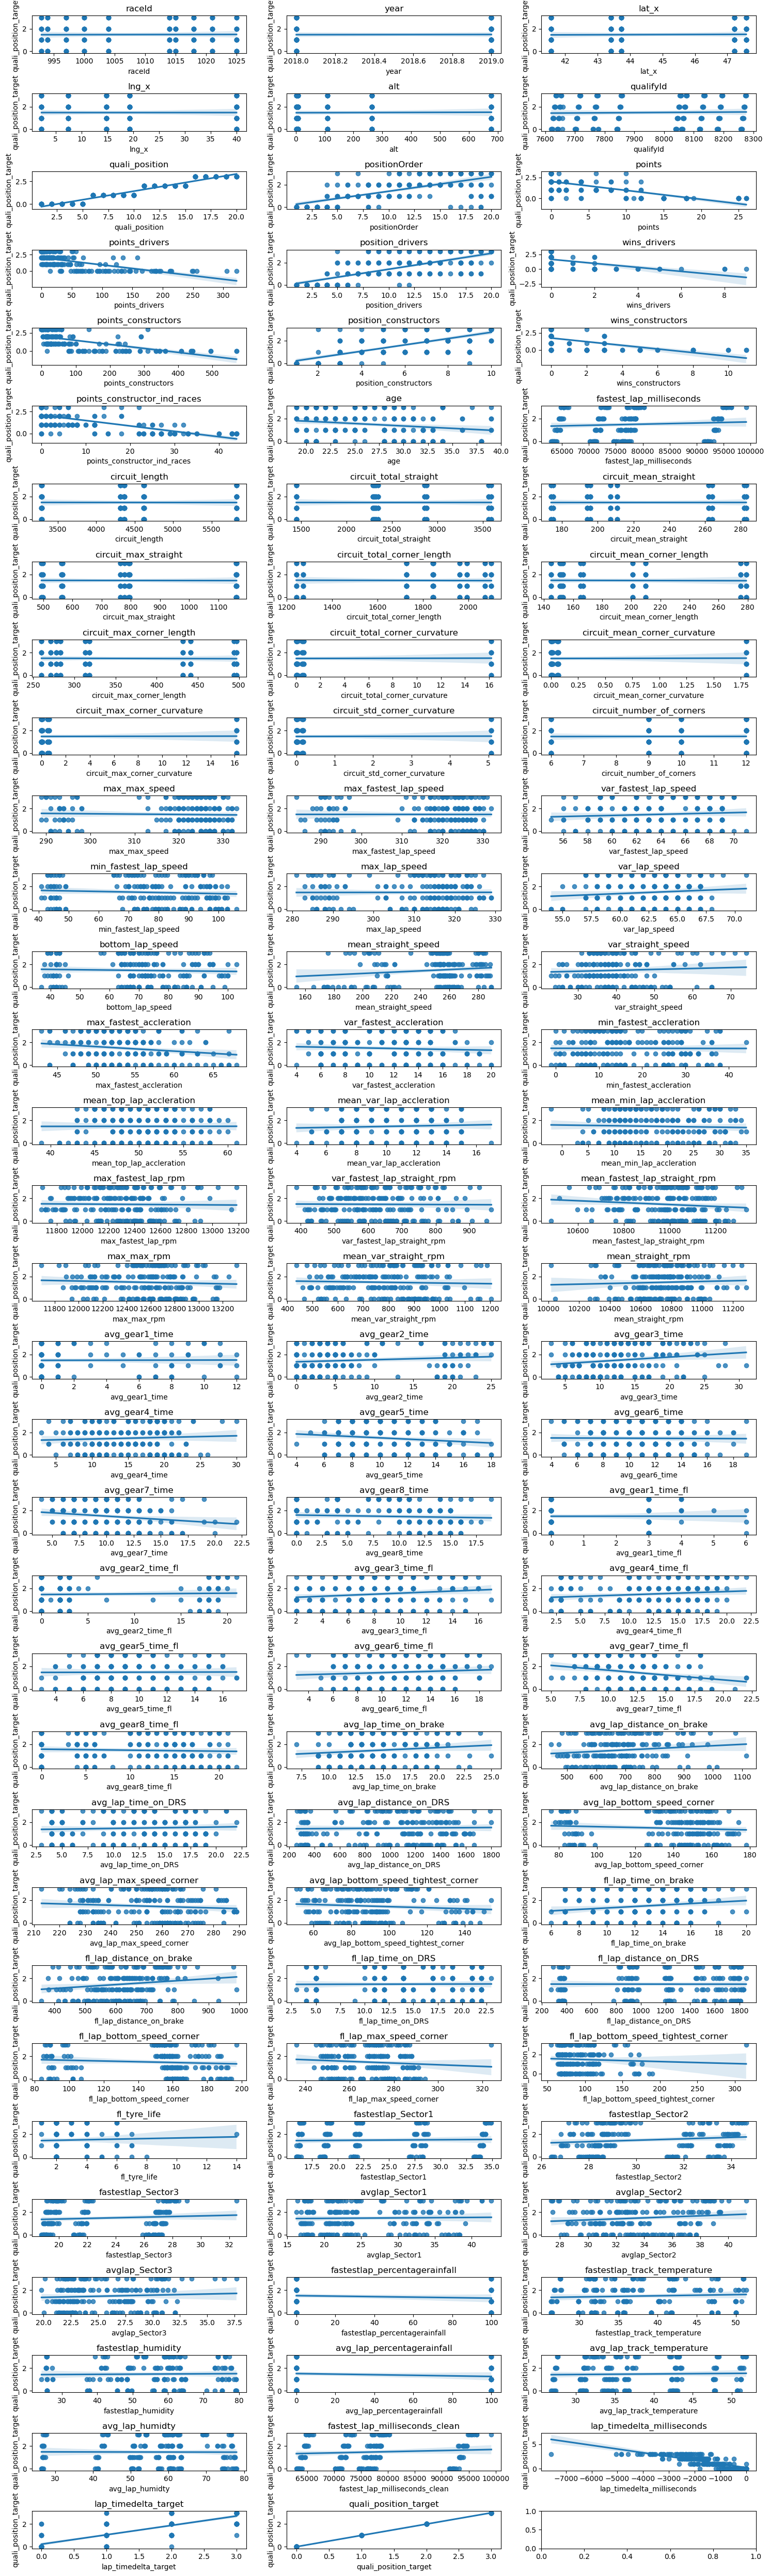

In [49]:
num_col=qualifying_df.select_dtypes("number").columns
correlation_test(qualifying_df,num_col,'quali_position_target',figsize=(15,50))